Importing useful libraries and modules


In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

 Defining data augmentation and preprocessing parameters

In [25]:

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

Load and preprocess the training dataset

In [3]:
 
train_data = datagen.flow_from_directory(
    r'C:\Users\gaura\Desktop\Internship Projects\Final Project ML\Plant_leave_diseases_dataset_without_augmentation\Train',
    target_size=(224, 224),  # Adjust the target size as needed
    batch_size=32,
    class_mode='categorical'  # Change to 'binary' if you have only two classes
)

Found 3400 images belonging to 17 classes.


 Load and preprocess the test dataset

In [4]:

test_data = datagen.flow_from_directory(
    r'C:\Users\gaura\Desktop\Internship Projects\Final Project ML\Plant_leave_diseases_dataset_without_augmentation\Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 848 images belonging to 17 classes.


Defining labels for all the 17 classes

In [5]:
class_labels = {
 0:'Disease - Apple_scab',
   1:'Disease - Apple Black rot',
     2:'Disease - Cedar apple rust',
     3:'Healthy Apple',
     4:'Healthy Cherry',
     5:'Disease - Cherry Powdery mildew',
    6:'Disease - Corn_Cercospora_leaf_spot Gray_leaf_spot',
    7:'Disease - Corn Common rust',
    8:'Healthy Corn',
    9:'Disease - Grape Black rot',
    10:"Healthy Grape",
    11:"Diseaes - Grape Leaf blight_(Isariopsis_Leaf_Spot)",
    12:"Pepper,_bell___Bacterial_spot",
    13:"Pepper,_bell___healthy",
    14:"Potato___Early_blight",
    15:"Potato___healthy",
    16:"Potato___Late_blight"
}

1 random images from all the 17 classes of the training dataset

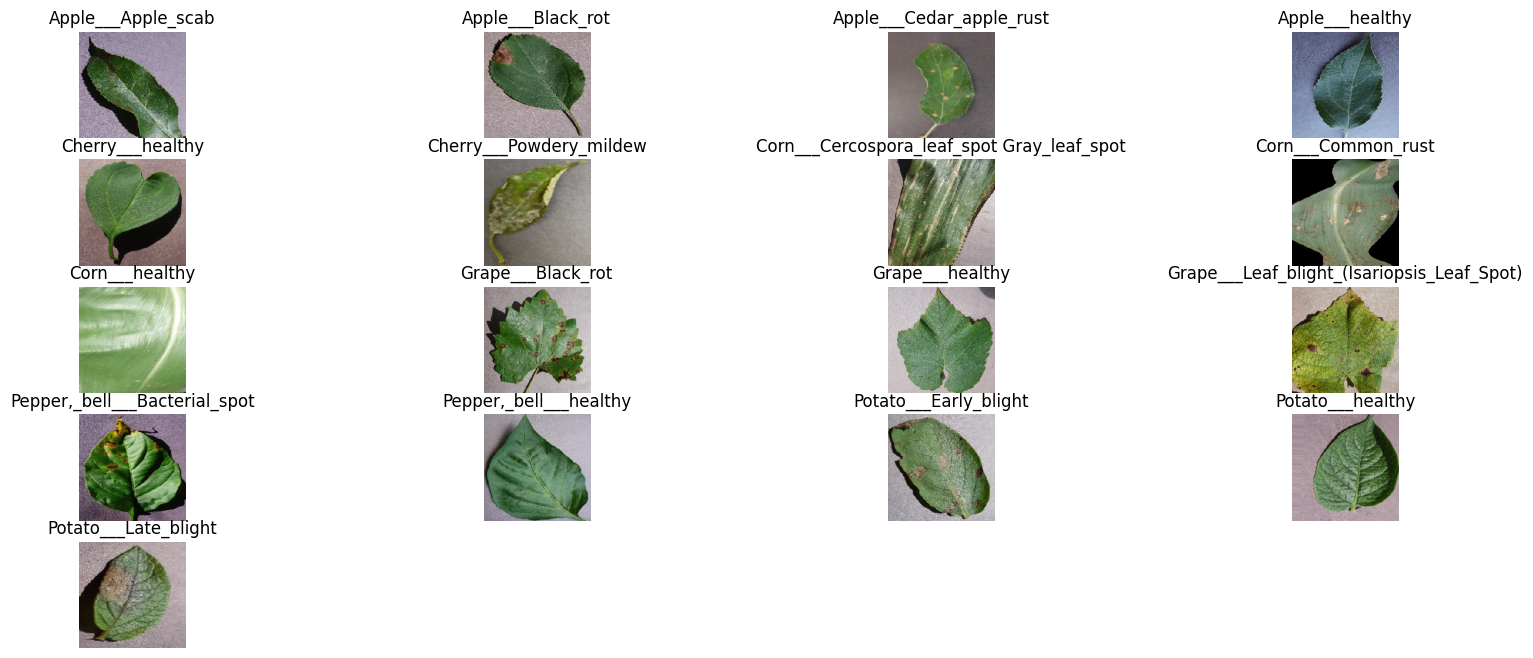

In [6]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the path to your training dataset
train_data_dir = r'C:\Users\gaura\Desktop\Internship Projects\Final Project ML\Plant_leave_diseases_dataset_without_augmentation\Train'

# Get a list of subdirectories (each subdirectory corresponds to a class)
class_folders = os.listdir(train_data_dir)

# Create a figure to display the images
plt.figure(figsize=(20, 8))

# Loop through each class and display one random image
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(train_data_dir, class_folder)
    image_files = os.listdir(class_path)
    
    # Choose a random image from the class
    random_image_file = random.choice(image_files)
    random_image_path = os.path.join(class_path, random_image_file)
    
    # Load and display the image
    img = image.load_img(random_image_path, target_size=(224, 224))
    plt.subplot(5, 4, i + 1)  # Adjust subplot dimensions as needed
    plt.imshow(img)
    plt.title(class_folder)
    plt.axis('off')

plt.show()


Build and compile the model

In [7]:


from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(17, activation='softmax')  # Adjust 'num_classes' based on your dataset
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Model Summary


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 128)               2

Train and Saving the model  (In output error may be appearing as i have previously trained the data and this time i didn't run this cell.)

In [11]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the callback with a filepath to save the best model
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',  # Specify the filename and path where the best model will be saved
    monitor='val_accuracy',    # Monitor a specific metric (e.g., validation accuracy)
    save_best_only=True,       # Save only the best model (based on the monitored metric)
    mode='max',                # Maximize the monitored metric (or 'min' for minimizing)
    verbose=1                   # Verbosity level, set to 1 for progress updates
)

# Pass the callback to the model.fit() method
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[checkpoint_callback]
)


Epoch 1/20
  4/107 [>.............................] - ETA: 1:50 - loss: 14.5054 - accuracy: 0.1016

KeyboardInterrupt: 

Loading the saved model

In [22]:
from tensorflow.keras.models import load_model
model = load_model(r"C:\Users\gaura\Desktop\Internship Projects\Final Project ML\best_model.h5")

Plotting a graph for accuracy and epoch (In output error may be appearing as i have previously trained the data and this time i didn't run this cell.)

In [24]:

plt.plot(model.history["accuracy"],label="accuracy")
plt.plot(model.history["val_accuracy"],label="validation")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.ylim([0.4,1])
plt.legend()
plt.show()

TypeError: 'NoneType' object is not subscriptable

Test Accuracy

In [15]:
test_loss, test_accuracy = model.evaluate(test_data)
print("Test Accuracy:", test_accuracy)

27/27 [==============================] - 11s 402ms/step - loss: 0.3241 - accuracy: 0.9021
Test Accuracy: 0.9021226167678833


Predicting the output for an image

In [ ]:
from tensorflow.keras.preprocessing import image
# Load and preprocess the test image
test labels=[]
test_image_path = r"C:\Users\gaura\Desktop\Internship Projects\Final Project ML\Plant_leave_diseases_dataset_without_augmentation\Test\Pepper,_bell___Bacterial_spot\image (417).JPG"
test_img = image.load_img(test_image_path, target_size=(224, 224))
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
test_img /= 255.0  # Normalize pixel values

# Make predictions
predictions = model.predict(test_img)

# Interpret the predictions
class_indices = np.argmax(predictions, axis=1)
predicted_class_index = class_indices[0]

# Map the predicted class index to the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label
print("Predicted Class:", predicted_class_label)

1/1 [==============================] - 0s 46ms/step
Predicted Class: Pepper,_bell___Bacterial_spot
